<a href="https://colab.research.google.com/github/XiaoLiang28/Xiao/blob/main/Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About Dataset**

Since 2009, at least 177 of America’s schools experienced a shooting. These tragedies are as diverse as our nation, but the depth of trauma is hard to convey. There is no standard definition for what qualifies as a school shooting in the US. Nor is there a universally accepted database. So CNN built our own. We examined 10 years of shootings on K-12 campuses and found two sobering truths: School shootings are increasing, and no type of community is spared.
![image.png](attachment:089d2c85-c2aa-4058-8e57-99b6c2b6e070.png)!

<ul>
<li><strong>LONCOD:</strong> Longitude code</li>
<li><strong>LATCOD:</strong> Latitude code</li>
<li><strong>CDCODE:</strong> Code for the Center for Disease Control and Prevention (CDC)</li>
<li><strong>year:</strong> Year of the incident</li>
<li><strong>school:</strong> Name of the school</li>
<li><strong>city:</strong> City where the incident occurred</li>
<li><strong>state:</strong> State where the incident occurred</li>
<li><strong>address:</strong> Address where the incident occurred</li>
<li><strong>urbanrural:</strong> Whether the incident occurred in an urban or rural area</li>
<li><strong>race:</strong> Race of the perpetrator or victims (if applicable)</li>
<li><strong>killed:</strong> Number of people killed in the incident</li>
<li><strong>injured:</strong> Number of people injured in the incident</li>
<li><strong>victims:</strong> Total number of victims in the incident (including those killed and injured)</li>
<li><strong>date:</strong> Date of the incident</li>
<li><strong>type:</strong> Type of incident (e.g., shooting, stabbing, etc.)</li>
<li><strong>NCESSCH:</strong> National Center for Education Statistics (NCES) School ID</li>
<li><strong>time:</strong> Time of the incident</li>
</ul>

# **EDA**


In [33]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import scipy.stats as stats
from scipy.stats import f_oneway
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='my_application')
from folium.plugins import TimestampedGeoJson
import plotly.express as px
from datetime import datetime

from folium.plugins import MarkerCluster

In [53]:
df=pd.read_csv("https://github.com/XiaoLiang28/Xiao/raw/main/dataset%20for%20presentation.csv")

## Handle Null Values Using GeoPy Lib


In [55]:
def nullvalues(df):
    null_counts = df.isnull().sum()
    null_cols = null_counts[null_counts > 0].index.tolist()
    if null_cols:
        print(f'Total null values: {null_counts.sum()}')
        print(f'Columns with null values: {", ".join(null_cols)}')
        for col in null_cols:
            print(f'Number of null values in {col}: {null_counts[col]}')
    else:
        print('No null values found.')
nullvalues(df)

Total null values: 38
Columns with null values: LONCOD, LATCOD, CDCODE, urbanrural, race, NCESSCH, time
Number of null values in LONCOD: 3
Number of null values in LATCOD: 3
Number of null values in CDCODE: 11
Number of null values in urbanrural: 3
Number of null values in race: 7
Number of null values in NCESSCH: 5
Number of null values in time: 6


In [56]:
lat = df['LATCOD'].isnull()
lon = df['LONCOD'].isnull()
df_latlon = df[lat & lon]
df_latlon

,LONCOD,LATCOD,CDCODE,year,school,city,state,address,urbanrural,race,killed,injured,victims,date,type,NCESSCH,time
80,NaN,NaN,NaN,2015,Duval County school bus,Jacksonville,Florida,118th Street and Blanding Boulevard,NaN,NaN,0,2,2,14-May-15,K-12,NaN,4:20PM
111,NaN,NaN,NaN,2016,Smalls Athletic Field,York,Pennsylvania,31 Hamilton Ave,NaN,NaN,0,2,2,9-Sep-16,High School,NaN,9:30PM
137,NaN,NaN,NaN,2017,JFK Stadium,Springfield,Missouri,1333 S Grant Ave,NaN,NaN,0,1,1,22-Jun-17,High School,NaN,6:45PM


After apply the function, check the null values.

In [57]:
nullvalues(df)

Total null values: 38
Columns with null values: LONCOD, LATCOD, CDCODE, urbanrural, race, NCESSCH, time
Number of null values in LONCOD: 3
Number of null values in LATCOD: 3
Number of null values in CDCODE: 11
Number of null values in urbanrural: 3
Number of null values in race: 7
Number of null values in NCESSCH: 5
Number of null values in time: 6


## **Using a geography map to visualize the killed student with their respective location.** 


In [42]:
print("min killed", df['killed'].min())

KeyError: ignored

The maximum number of killed students is 26. We can categories in three different categories to use different color formats in the map.
1. <span style='color:green'> Green = 0 Killed student ( Safe) </span>
2. <span style='color:black'> Yellow= less than 5 killed </span>
3. <span style='color:red'> Red Danger: more than 5 killed </span>


In [10]:

m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)
for index, row in df.iterrows():
    lat = row['LATCOD']
    lon = row['LONCOD']
    city = row['city']
    school = row['school']
    killed = row['killed']
    
    if killed == 0:
        color = 'green'
    elif killed < 5:
        color = 'yellow'
    else:
        color = 'red'
    
    radius = killed * 5
    
    popup = folium.Popup('School: {}, : City {}, Killed: {}'.format(city, school, killed), parse_html=True)
    
    folium.CircleMarker(location=[lat, lon], radius=radius, color=color, fill=True, fill_color=color, popup=popup).add_to(m)

# Display the map
m


KeyError: ignored

In [11]:


latitudes = df['LATCOD'].dropna().astype(float).tolist()
longitudes = df['LONCOD'].dropna().astype(float).tolist()
killed = df['killed'].dropna().astype(int).tolist()
dates = df['date'].tolist()

# Create map centered on the US
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add marker cluster layer
marker_cluster = MarkerCluster().add_to(m)

# Iterate over the data and add markers to the map
for lat, lon, num_killed, date in zip(latitudes, longitudes, killed, dates):
    if not pd.isna(lat) and not pd.isna(lon):
        popup_text = f"{num_killed} killed on {date}"
        folium.CircleMarker(location=[lat, lon], radius=num_killed, popup=popup_text).add_to(marker_cluster)

# Display the map
m


KeyError: ignored

## Timestamp map with folium library

In [12]:
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%y')


data = df[['LONCOD', 'LATCOD', 'killed', 'date']]

# Convert the date column to datetime format
data['date'] = pd.to_datetime(df['date'], format='%d-%b-%y')

# Group the data by date and location and sum the number of people killed
data = df.groupby(['date', 'LATCOD', 'LONCOD']).sum().reset_index()

# Create a function to format the data for the TimestampedGeoJson plugin
def create_geojson_features(df):
    features = []
    for _, row in df.iterrows():
        feature = {
            'type': 'Feature',
            'geometry': {
                'type': 'Point',
                'coordinates': [row['LONCOD'], row['LATCOD']]
            },
            'properties': {
                'time': row['date'].date().isoformat(),
                'icon': 'circle',
                'iconstyle': {
                    'fillColor': 'red',
                    'fillOpacity': 0.8,
                    'stroke': 'false',
                    'radius': row['killed'] * 5
                }
            }
        }
        features.append(feature)
    return features

school_map = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

TimestampedGeoJson(
    {'type': 'FeatureCollection', 'features': create_geojson_features(data)},
    period='P1M',
    add_last_point=True,
    auto_play=True,
    loop=True,
    max_speed=1,
    loop_button=True,
    date_options='YYYY-MM-DD',
    time_slider_drag_update=True,
).add_to(school_map)

# Display the map
school_map


KeyError: ignored

## Monthwise Killed number

In [13]:

# create a new column for the month
df['month'] = df['date'].dt.month_name()

# group the data by month and count the number of students killed
monthly_counts = df.groupby('month')['killed'].sum()

# create a list of the month names in the correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# reindex the monthly_counts Series with the month_order list
monthly_counts = monthly_counts.reindex(month_order)

# print the monthly counts
print(monthly_counts)

KeyError: ignored

In [14]:
def count_killed_by_month(df):
    df['date'] = pd.to_datetime(df['date'], format='%d-%b-%y', errors='coerce')
    df = df.dropna(subset=['date'])
    df['month'] = df['date'].dt.month
    df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])
    df['year'] = df['date'].dt.year
    df['count'] = 1
    killed_by_month = df.groupby(['year', 'month'])['killed', 'count'].sum()
    killed_by_month = killed_by_month.reset_index()
    # add missing months
    all_months = list(calendar.month_abbr)[1:]
    all_years = range(df['year'].min(), df['year'].max()+1)
    missing_months = [(y, m) for y in all_years for m in all_months if (y, m) not in zip(killed_by_month['year'], killed_by_month['month'])]
    missing_df = pd.DataFrame(missing_months, columns=['year', 'month'])
    missing_df['killed'] = 0
    missing_df['count'] = 0
    killed_by_month = pd.concat([killed_by_month, missing_df])
    killed_by_month = killed_by_month.sort_values(['year', 'month'], ascending=[True, True])
    killed_by_month = killed_by_month[['year', 'month', 'killed', 'count']]
    # print results
    print('\033[1m' + 'Month-wise count of students killed:' + '\033[0m')
    print(killed_by_month)
    print('\n')
    print('\033[1m' + 'Number of null date values:' + '\033[0m')
    print(df['date'].isnull().sum())


In [15]:
count_killed_by_month(df)

KeyError: ignored

## Statistical hypothesis test to test relationship between number of killed to victims

* Null hypothesis (H0): There is no linear correlation between the number of victims and the number of killed
* Alternative hypothesis (Ha): There is a linear correlation between the number of victims and the number of killed.

In [16]:
from scipy.stats import pearsonr

corr, p_val = pearsonr(df['victims'], df['killed'])

print('Pearson correlation coefficient:', corr)
print('p-value:', p_val)


KeyError: ignored

**Above values show positive linear correlation between the number of victims and the number of killed**.P values is more than 0.05. We can reject null hypothesis.

In [17]:


sns.set(style="whitegrid")

# create scatter plot with regression line
sns.lmplot(x="victims", y="killed", data=df)

# set axis labels and plot title
plt.xlabel("Number of Victims")
plt.ylabel("Number of Killed")
plt.title("Relationship between Number of Victims and Number of Killed")

# display the plot
plt.show()


KeyError: ignored

## Statistical hypothesis test to test  number of killed among the different racial groups & barchart

* Null hypothesis (H0): There is no significant difference in the mean number of killed among the different racial groups. 
* Alternative hypothesis (Ha): There is a significant difference in the mean number of killed among the different racial groups.

In [18]:
df = df.dropna(subset=['race'])
df = df[df['race'] != 'Unknown']

# Create separate data frames for each race
df_black = df[df['race'] == 'BLACK']
df_white = df[df['race'] == 'WHITE']
df_hisp = df[df['race'] == 'HISP']
df_asian = df[df['race'] == 'ASIAN']

# Extract the number of killings for each race
killings_black = df_black['killed']
killings_white = df_white['killed']
killings_hisp = df_hisp['killed']
killings_asian = df_asian['killed']

# Perform ANOVA test
f_statistic, p_value = f_oneway(killings_black, killings_white, killings_hisp, killings_asian)

# Print results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

KeyError: ignored

**The F-statistic of 1.655 and the p-value of 0.179 suggest that there is no significant difference in the number of killings among the different races. The null hypothesis cannot be rejected.**

In [19]:

# Count number of killings for each race
killed_counts = df.groupby('race')['killed'].sum().reset_index()

# Plot barplot using Seaborn
sns.barplot(x='race', y='killed', data=killed_counts)
plt.title('Number of Killings by Race')
plt.xlabel('Race')
plt.ylabel('Number of Killings')
plt.show()


KeyError: ignored

## Barchart of number of killed over the Year & Moonth-Year

In [20]:
df['date'] = pd.to_datetime(df['date'])

# group by date and sum killed column
df_killed = df.groupby('date')['killed'].sum().reset_index()

# create plot
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="date", y="killed")
plt.title("Number of Killed Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Killed")
plt.show()

KeyError: ignored

In [21]:
killed_per_year = df.groupby('year')['killed'].sum().reset_index()

sns.barplot(x='year', y='killed', data=killed_per_year)

KeyError: ignored

In [22]:
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%y')

# Create a new column for year and month
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()

# Group by year and month and count the number of killed people
killed_by_year_month = df.groupby(['year', 'month'])['killed'].sum().reset_index()

# Plot the barplot
sns.set_style("whitegrid")
sns.set_palette("Set2")
sns.set(font_scale=1.2)
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='killed', hue='month', data=killed_by_year_month)
plt.title("Number of killed people by year and month")
plt.xlabel("Year")
plt.ylabel("Number of killed people")
plt.show()

KeyError: ignored

## Relationship between Number of Victims and Number of Injured

In [23]:


sns.set(style="whitegrid")

# create scatter plot with regression line
sns.lmplot(x="victims", y="injured", data=df)

# set axis labels and plot title
plt.xlabel("Number of Victims")
plt.ylabel("Number of injured")
plt.title("Relationship between Number of Victims and Number of Injured")

# display the plot
plt.show()


KeyError: ignored

## Number of Killed, Injured, and Victims by Urbanrural

In [24]:
urbanrural_data = df.groupby('urbanrural')[['killed', 'injured', 'victims']].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='urbanrural', y='value', hue='variable', 
            data=pd.melt(urbanrural_data, id_vars='urbanrural', value_vars=['killed', 'injured', 'victims']))
plt.title('Number of Killed, Injured, and Victims by Urbanrural')
plt.xlabel('Urbanrural')
plt.ylabel('Count')
plt.show()


KeyError: ignored

## Number of Killed, Injured, and Victims by School Type

In [25]:


sns.set_style('whitegrid')

urbanrural_data = df.groupby('type')[['killed', 'injured', 'victims']].sum().reset_index()
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(14, 3.5))
sns.barplot(x='type', y='value', hue='variable', 
            data=pd.melt(urbanrural_data, id_vars='type', value_vars=['killed', 'injured', 'victims']))
plt.title('Number of Killed, Injured, and Victims by School Type')
plt.xlabel('Urbanrural')
plt.ylabel('Count')
plt.show()


KeyError: ignored

## Using date column, converting date & time in morning,afternoon & evening

In [26]:
df["time"] = pd.to_datetime(df["time"], format="%I:%M%p")
df["time_of_day"] = pd.cut(df["time"].dt.hour, bins=[0, 12, 17, 23], labels=["morning", "noon", "afternoon"])

df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")

df["datetime"] = df["date"] + pd.to_timedelta(df["time"].dt.strftime('%H:%M:%S'))

KeyError: ignored

## Number of incidents based on morning, afternoon and evening

In [27]:
counts = df["time_of_day"].value_counts()

# Visualize the results using a bar plot with Seaborn
sns.barplot(x=counts.index, y=counts.values)

KeyError: ignored

In [28]:
sns.countplot(x="time_of_day", hue="urbanrural", data=df)


ValueError: ignored

## Using the month of the incident, adding new column called season (winter, summer, spring, fall) & barchart

In [29]:
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
df["month"] = df["date"].dt.month

# Define a function to map months to seasons
def get_season(month):
    if month in [3, 4, 5]:
        return "spring"
    elif month in [6, 7, 8]:
        return "summer"
    elif month in [9, 10, 11]:
        return "fall"
    else:
        return "winter"

# Apply the function to the "month" column and create a new "season" column
df["season"] = df["month"].apply(get_season)

KeyError: ignored

In [30]:
sns.countplot(x="urbanrural", hue="season", data=df)


ValueError: ignored

## Create a new column with labels for time of day

In [31]:
df["time"] = pd.to_datetime(df["time"], format="%I:%M%p")
df["hour"] = df["time"].dt.hour

# Create a new column with labels for time of day
time_labels = ["late_night", "early_morning", "start_of_morning", "end_of_morning",
               "starting_of_noon", "end_of_noon", "starting_of_afternoon", 
               "end_of_afternoon", "starting_of_evening", "end_of_evening", 
               "starting_of_night"]
time_bins = [0, 3, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
df["specifi time"] = pd.cut(df["hour"], bins=time_bins, labels=time_labels, include_lowest=True)

KeyError: ignored

ValueError: ignored

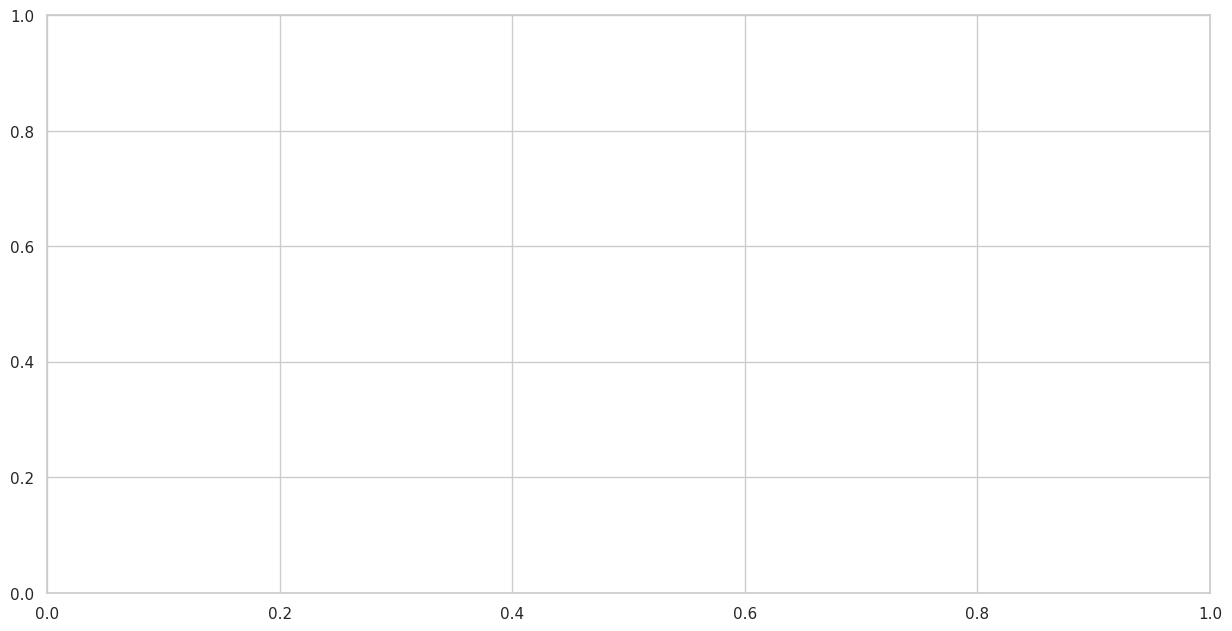

In [32]:
fig, ax = plt.subplots(figsize=(15, 7.5
    ))
sns.countplot(x="urbanrural", hue="specifi time", data=df,palette=sns.color_palette('Set2', n_colors=15))
